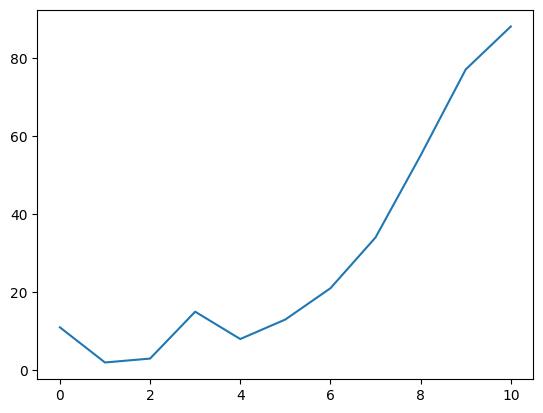

        fecha       hora  temperatura  Humedad Relativa  PresionAtmosferica  \
0     01-01-16   0:00:07       30.017            71.095             1015.61   
1     01-01-16   0:01:06       29.989            71.328             1015.61   
2     01-01-16   0:02:06       29.983            71.232             1015.61   
3     01-01-16   0:03:06       29.921            71.333             1015.61   
4     01-01-16   0:04:06       29.860            71.740             1015.61   
...        ...       ...          ...               ...                 ...   
3994  01-03-16  18:34:07       29.226            92.131             1012.99   
3995  01-03-16  18:35:07       29.190            93.380             1012.99   
3996  01-03-16  18:36:07       29.213            93.058             1012.99   
3997  01-03-16  18:37:07       29.207            91.130             1012.99   
3998  01-03-16  18:38:07       29.194            92.040             1012.99   

     RadiacionSolar  Velocidad  Potencia  
0       

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataframe = pd.read_csv('Data.csv', sep=';',encoding ='latin-1')
lista1 = [11,2,3,15,8,13,21,34, 55, 77, 88]
plt.plot(lista1)
plt.show()
print(dataframe)
# print(plt)

In [4]:

import time
import requests
import math
import random
import pandas as pd
import numpy as np

TOKEN = "BBFF-xq4ANXPuJOsDpJ7gvAdQPuJlnsKjMb"  # Put your TOKEN here
DEVICE_LABEL = "regresion-lineal"  # Put your device label here 

VARIABLE_LABEL_1 = "fecha"  # Put your first variable label here
VARIABLE_LABEL_2 = "hora"  # Put your first variable label here
VARIABLE_LABEL_3 = "temperatura"  # Put your first variable label here
VARIABLE_LABEL_4 = "humedad relativa"  # Put your second variable label here
VARIABLE_LABEL_5 = "presión atmosférica"  # Put your second variable label here
VARIABLE_LABEL_6 = "radiación solar"  # Put your first variable label here
VARIABLE_LABEL_7 = "velocidad"  # Put your second variable label here
VARIABLE_LABEL_8 = "potencia"  # Put your second variable label here
VARIABLE_LABEL_9 = "position"  # Put your second variable label here

df= pd.DataFrame(dataframe)
dataframe = pd.read_csv('Data.csv', sep=';',encoding ='latin-1')


def build_payload(variable_1, variable_2, variable_3, variable_4, variable_5, variable_6, variable_7, variable_8, variable_9):
    # Creates two random values for sending data
    value_1 = dataframe.columns[0]
    value_2 = dataframe.columns[1]
    value_3 = dataframe.columns[2]
    value_4 = dataframe.columns[3]
    value_5 = dataframe.columns[4]
    value_6 = dataframe.columns[5]
    value_7 = dataframe.columns[6]
    value_8 = dataframe.columns[7]

    # Creates a random gps coordinates
    lat = random.randrange(34, 36, 1) + \
        random.randrange(1, 1000, 1) / 1000.0
    lng = random.randrange(-83, -87, -1) + \
        random.randrange(1, 1000, 1) / 1000.0
    payload = {variable_1: value_1,
               variable_2: value_2,
               variable_3: value_3,
                variable_4: value_4,
                 variable_5: value_5,
                  variable_6: value_6,
                   variable_7: value_7,
                    variable_8: value_8,
                     variable_9: {"value": 1, "context": {"lat": lat, "lng": lng}}}

    return payload


def post_request(payload):
    # Creates the headers for the HTTP requests
    url = "http://industrial.api.ubidots.com"
    url = "{}/api/v1.6/devices/{}".format(url, DEVICE_LABEL)
    headers = {"X-Auth-Token": TOKEN, "Content-Type": "application/json"}

    # Makes the HTTP requests
    status = 400
    attempts = 0
    while status >= 400 and attempts <= 5:
        req = requests.post(url=url, headers=headers, json=payload)
        status = req.status_code
        attempts += 1
        time.sleep(1)

    # Processes results
    print(req.status_code, req.json())
    if status >= 400:
        print("[ERROR] Could not send data after 5 attempts, please check \
            your token credentials and internet connection")
        return False

    print("[INFO] request made properly, your device is updated")
    return True


def main():
    payload = build_payload(
        VARIABLE_LABEL_1, VARIABLE_LABEL_2, VARIABLE_LABEL_3, VARIABLE_LABEL_4, VARIABLE_LABEL_5, VARIABLE_LABEL_6, VARIABLE_LABEL_7, VARIABLE_LABEL_8, VARIABLE_LABEL_9)

    print("[INFO] Attemping to send data")
    post_request(payload)
    print("[INFO] finished")


if __name__ == '__main__':
    while (True):
        main()
        time.sleep(1)

[INFO] Attemping to send data
200 {'fecha': [{'status_code': 400, 'errors': {'error': {'message': 'The value NaN is not in a valid range.', 'code': 400001}}}], 'hora': [{'status_code': 400, 'errors': {'error': {'message': 'The value NaN is not in a valid range.', 'code': 400001}}}], 'humedad-relativa': [{'status_code': 400, 'errors': {'error': {'message': 'The value NaN is not in a valid range.', 'code': 400001}}}], 'position': [{'status_code': 201}], 'potencia': [{'status_code': 400, 'errors': {'error': {'message': 'The value NaN is not in a valid range.', 'code': 400001}}}], 'presion-atmosferica': [{'status_code': 400, 'errors': {'error': {'message': 'The value NaN is not in a valid range.', 'code': 400001}}}], 'radiacion-solar': [{'status_code': 400, 'errors': {'error': {'message': 'The value NaN is not in a valid range.', 'code': 400001}}}], 'temperatura': [{'status_code': 400, 'errors': {'error': {'message': 'The value NaN is not in a valid range.', 'code': 400001}}}], 'velocidad'

KeyboardInterrupt: 

In [ ]:
#dataframe.describe()
#dataframe.isnull()
#dataframe.isnull().sum()
dataframe.dropna(inplace=True)
dataframe.isnull().sum().sum()
print(dataframe)
dataframe.dtypes

            fecha          hora  temperatura  Humedad Relativa  \
0       01/01/2016  12:00:07 AM       30.017            71.095   
1       01/01/2016  12:01:06 AM       29.989            71.328   
2       01/01/2016  12:02:06 AM       29.983            71.232   
3       01/01/2016  12:03:06 AM       29.921            71.333   
4       01/01/2016  12:04:06 AM       29.860            71.740   
...            ...          ...          ...               ...   
118892  06/23/2016   7:00:09 PM       29.211            63.918   
118893  06/23/2016   8:00:10 PM       28.760            66.897   
118894  06/23/2016   9:00:10 PM       28.158            71.015   
118895  06/23/2016  10:00:10 PM       28.003            72.262   
118896  06/23/2016  11:00:10 PM       27.784            72.638   

        PresionAtmosferica  RadiacionSolar  Velocidad  Potencia  
0                  1015.61           0.074      1.703  -36.6627  
1                  1015.61           0.165      0.859  -38.4633  
2        

fecha                  object
hora                   object
temperatura           float64
Humedad Relativa      float64
PresionAtmosferica    float64
RadiacionSolar        float64
Velocidad             float64
Potencia              float64
dtype: object

In [ ]:
X = dataframe.iloc[:, 2:7].values
y = dataframe.iloc[:, 7].values
#dataframe['PresionAtmosferica'] = dataframe['PresionAtmosferica'].apply(lambda x: x.replace(',','.'))
#dataframe['PresionAtmosferica'] = dataframe['PresionAtmosferica'].astype(float)

#dataframe['PresionAtmosferica']=dataframe['PresionAtmosferica'].replace(to_replace=',', value='.', regex=True)
#dataframe.astype('PresionAtmosferica':float)
#dataframe.dtypes
dataframe.head(5)


,fecha,hora,temperatura,Humedad Relativa,PresionAtmosferica,RadiacionSolar,Velocidad,Potencia
0,01/01/2016,12:00:07 AM,30.017,71.095,1015.61,0.074,1.703,-36.6627
1,01/01/2016,12:01:06 AM,29.989,71.328,1015.61,0.165,0.859,-38.4633
2,01/01/2016,12:02:06 AM,29.983,71.232,1015.61,0.292,2.633,-39.4124
3,01/01/2016,12:03:06 AM,29.921,71.333,1015.61,0.467,2.016,-39.8277
4,01/01/2016,12:04:06 AM,29.860,71.740,1015.61,0.480,1.789,-40.0013


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_test)

[[-0.73060999 -1.29215334 -0.23784344 -0.33259576  0.56462383]
 [-0.42121906  0.83523909  0.90425807 -0.93872825 -1.04373651]
 [ 1.15064293  0.5573673  -0.91113473  1.27010992 -0.94641137]
 ...
 [-0.32279013  0.63975504  1.1635999   0.64918482  2.31897187]
 [-0.16794462  0.3937828  -2.87614782  1.64373014  0.41863612]
 [ 1.54645927  0.4421459  -0.76650179 -1.048161    0.52594332]]


In [ ]:


from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train)

[[-0.52683422]
 [-1.56153771]
 [-0.3968474 ]
 ...
 [ 1.47689793]
 [ 1.02994676]
 [ 0.16707471]]


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
#LinearRegression(copy_x=true, fit_intercept=True, n_jobs=None, normalize=False)
y_pred = model.predict(X_test)
print(X_test)

[[ 1.14117622]
 [-0.06466682]
 [-0.56228182]
 ...
 [-1.30698904]
 [ 0.23350589]
 [-1.3089557 ]]


In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [0.09260949]
Intercept: -38.41971724841246
Mean squared error (MSE): 0.36
Coefficient of determination (R^2): 0.04


In [ ]:
r2_score(y_test, y_pred)

0.036955819307802895

In [ ]:
r2_score(y_test, y_pred).dtype

dtype('float64')

In [ ]:
'%f' % 0.523810833536016

'0.523811'

In [ ]:
import seaborn as sns
y_test

array([-38.2961, -38.4584, -38.3016, ..., -39.3961, -38.1025, -38.0629])

In [ ]:
import numpy as np
np.array(y_test)

array([-38.2961, -38.4584, -38.3016, ..., -39.3961, -38.1025, -38.0629])

In [ ]:
y_pred

array([-38.3140335 , -38.42570601, -38.47178988, ..., -38.54075684,
       -38.39809239, -38.54093897])